In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()[0]
most_recent_date

'2017-08-23'

Text(0, 0.5, 'Inches')

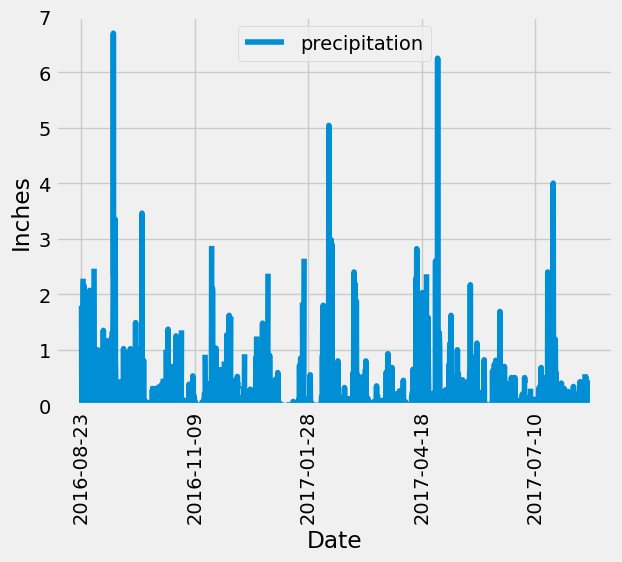

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date_date = dt.datetime.strptime(most_recent_date, "%Y-%m-%d").date()

# Calculate the date one year from the last date in data set.
one_year_prior_date = most_recent_date_date - relativedelta(years=1)
one_year_prior = one_year_prior_date.strftime("%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
measurements_one_year = session.query(Measurement.date, 
                                      Measurement.prcp)\
    .filter(Measurement.date >= one_year_prior)\
    .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurements_1yr_df = pd.DataFrame(measurements_one_year, columns=["date", "precipitation"])

# Sort the dataframe by date
m1yr_sorted = measurements_1yr_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
m1yr_sorted.plot(x='date', y='precipitation', rot=90)

plt.xlabel('Date')
plt.ylabel('Inches')
plt.ylim(0,7)
# plt.tight_layout()  # Removed to make graph match provied example
# plt.show()  # Removed so text output from provided example does not get swallowed
plt.Text(0, 0.5, 'Inches')  # Added so text output from provided example apprears


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
m1yr_sorted.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
# session.query(Station.name).distinct(Station.name).count()  # Alt count, returns int rather than list of rows
session.query(func.count(func.distinct(Station.name))).all()  # mirrors output from starter file

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_activity = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .all()
stations_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = stations_activity[0][0]

session.query(func.min(Measurement.tobs), 
              func.max(Measurement.tobs), 
              func.avg(Measurement.tobs))\
    .filter(Measurement.station == most_active_station)\
    .all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

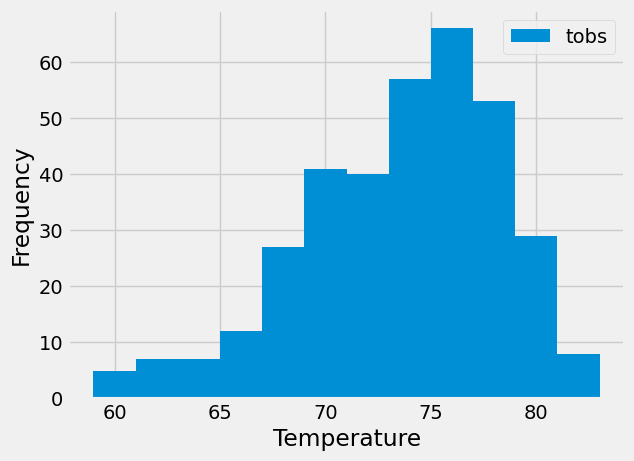

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station_one_year = session.query(Measurement.tobs)\
    .filter(Measurement.date >= one_year_prior)\
    .filter(Measurement.station == most_active_station)\
    .all()

top_station_1yr_df = pd.DataFrame(top_station_one_year)
top_station_1yr_df.plot(kind='hist', bins=12)

plt.xlabel('Temperature')
# plt.tight_layout()  # Removed to make graph match provied example
# plt.show()  # Removed so text output from provided example does not get swallowed

plt.Text(0.5, 4.183333333333314, 'Temperature')

# Close Session

In [16]:
# Close Session
session.close()